# **V6 on Complete Datatest**

In [ ]:
from wrapper import YOLOAPIWrappper
from pipeline import CPPipeline

### **Multiplicative**

In [ ]:
v6 = "/home/aws_install/conformal_prediction/trainings/v6_small_pretrained/exp/weights/best_ckpt.onnx"
yolov6_detector = YOLOAPIWrappper(v6,file_path='calibv6_all_test_multi.pickle', conf_thres=0.7, iou_thres=0.5)
pipev6 = CPPipeline(yolov6_detector, test_set='test', method='mutplicative')

In [ ]:
X_train, y_train, labels_train= pipev6.extract_yolo_dataset()
X_train, X_val, y_train, y_val, labels_train, labels_val = pipev6.calibration_and_val(X_train, y_train, labels_train)
conformal_predictor= pipev6.pipeline( X_train=X_train, y_train= y_train, labels_train= labels_train)

Predictions: [[1228.67211914 1400.33520508 1279.97216797 1464.41381836]
 [1447.62341309 1057.62963867 1640.74133301 1131.70825195]
 [1529.84985352 1209.61474609 1707.33520508 1396.5847168 ]
 ...
 [ 871.67877197 1024.9050293   939.8135376  1067.05859375]
 [1466.71081543 1103.89147949 1593.82556152 1250.55822754]
 [1266.87561035 1106.28674316 1389.25109863 1198.15393066]]
Matched Ground Truths: [[1229. 1398. 1278. 1467.]
 [1443. 1056. 1638. 1132.]
 [1529. 1209. 1709. 1404.]
 ...
 [ 871. 1021.  942. 1069.]
 [1464. 1104. 1591. 1246.]
 [1271. 1106. 1379. 1198.]]
Images: ['/home/aws_install/data/yolo_database/images/test/OMAD_13_35_03.jpeg', '/home/aws_install/data/yolo_database/images/test/mg7v0EMfJ74_ZBAA47.png', '/home/aws_install/data/yolo_database/images/test/UbPJcYKDwpM_LSZH49.png', '/home/aws_install/data/yolo_database/images/test/LICJ_20_35_05.jpeg', '/home/aws_install/data/yolo_database/images/test/LICJ_25_35_11.jpeg', '/home/aws_install/data/yolo_database/images/test/SAEZ_17_35_22.

Marginal coverage: 1.0
Average area: 68478.8828125


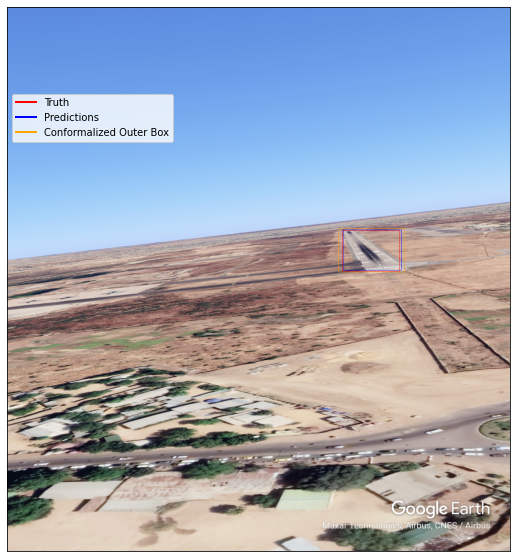

In [4]:
pipev6.infer_eval_single_image(
    conformal_predictor, 
    X_val[5],  # Image path at index 5
    y_val[5],  # Ground truth bounding boxes at index 5
    labels_val[5],  # Labels at index 5
    None  
)

In [5]:
y_pred_val, y_true_val, box_outer_val, images_val = pipev6.infer_eval_all(X_val, y_val, labels_val, conformal_predictor, visualize = False)

No detections in image /home/aws_install/data/yolo_database/images/test/KSFO_lL9NcuBRa-Y_21.png
No detections in image /home/aws_install/data/yolo_database/images/test/LFPO_CC-lSLLiueE_22.png
No detections in image /home/aws_install/data/yolo_database/images/test/DAAS_27_35_07.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/LGSM_27_35_12.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/OMAD_13_35_05.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/x3B0rnjW9fo_GCRR16.png
No detections in image /home/aws_install/data/yolo_database/images/test/DAAS_27_35_11.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/GCRR_21_35_02.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/LFRN_28_35_01.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/DAAS_27_35_03.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/OMAD